# Machine Learning in Crowd Modelling and Simulation
# Final Project
# Task 2: Dynamic Model Decomposition

### Group M:
1. Muhammad Waleed Bin Khalid
2. Qais Hamarneh
3. Yiming Zhang

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from DMD import *

%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=6)


## Stochastic Dynamics Example from
    https://arxiv.org/pdf/1312.0041.pdf

In [2]:
decay = 0.5
timesteps = 1000
noise_scale = 5
stochastic_dynamics = np.zeros((1, timesteps))


stochastic_dynamics[0] = noise_scale

for i in range(1 , timesteps):
    noise = np.random.rand() * 2 * noise_scale - noise_scale
    stochastic_dynamics[0, i] = decay * stochastic_dynamics[0, i - 1] + noise


In [3]:
dmd = DMD(stochastic_dynamics, time=np.arange(timesteps))

In [4]:
dmd.get_modes(1)
w = dmd.eig_vals

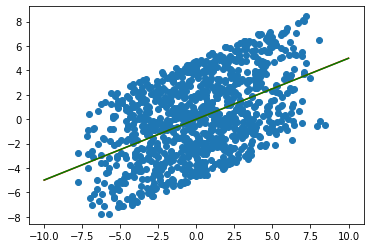

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(stochastic_dynamics[0, 0:-1], stochastic_dynamics[0, 1:])

x = np.linspace(-2 * noise_scale, 2 * noise_scale, 1000)
ax.plot(x, decay * x, color='red' )
ax.plot(x, w * x.T, color='green' )

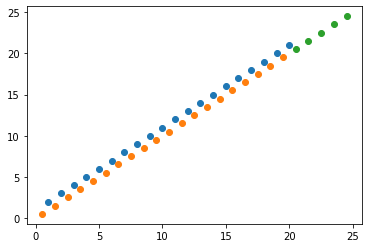

In [21]:
points = 20
X = np.zeros((2, points))
X[0, :] = np.arange(1, points + 1)
X[1, :] = np.arange(2, points + 2)

xdmd = DMD(X, np.arange(points))
dmd_reconstructed_x = xdmd.reconstruct().real
dmd_prediction = xdmd.predict(5).real

fig = plt.figure()
ax = plt.axes()
ax.scatter(X[0, :], X[1, :])

ax.scatter(dmd_reconstructed_x[0, :], dmd_reconstructed_x[1, :])
ax.scatter(dmd_prediction[0, :], dmd_prediction[1, :])


# x = np.linspace(-2 * noise_scale, 2 * noise_scale, 1000)
# ax.plot(x, decay * x, color='red' )
# ax.plot(x, w * x.T, color='green' )

In [ ]:
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 4 * np.pi, 80)
dt = t[1] - t[0]

X, T = np.meshgrid(x, t)

f1 = np.multiply(20-0.2*np.power(X, 2), np.exp((2.3j)*T))
f2 = np.multiply(X, np.exp(0.6j*T))
f3 = np.multiply(5*np.multiply(1/np.cosh(X/2), np.tanh(X/2)), 2*np.exp((0.1+2.8j)*T))

f = f1 + f2 + f3

In [ ]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(2, 2)
f1_ax = fig.add_subplot(gs[0, 0], projection='3d')
f2_ax = fig.add_subplot(gs[0, 1], projection='3d')
f3_ax = fig.add_subplot(gs[1, 0], projection='3d')
f_ax = fig.add_subplot(gs[1, 1], projection='3d')

f1_ax.plot_surface(X, T, f1, cmap="gray", rstride=1, cstride=1, alpha=None, antialiased=True)
f1_ax.set_xlabel("X")
f1_ax.set_ylabel("T")
f1_ax.set_zlabel("F")
f1_ax.set_title('f1');

f2_ax.plot_surface(X, T, f2, cmap="binary", rstride=1, cstride=1, alpha=None, antialiased=True)
f2_ax.set_xlabel("X")
f2_ax.set_ylabel("T")
f2_ax.set_zlabel("F")
f2_ax.set_title('f2');

f3_ax.plot_surface(X, T, f3, cmap="binary", rstride=1, cstride=1, alpha=None, antialiased=True)
f3_ax.set_xlabel("X")
f3_ax.set_ylabel("T")
f3_ax.set_zlabel("F")
f3_ax.set_title('f3')

f_ax.plot_surface(X, T, f, cmap="binary", rstride=1, cstride=1, alpha=None, antialiased=True)
f_ax.set_xlabel("X")
f_ax.set_ylabel("T")
f_ax.set_zlabel("F")
f_ax.set_title('f')

In [ ]:
dmd = DMD(data, time=t)
phi = dmd.get_modes(modes = 3)

In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.plot(x, phi[:,0].real)
ax.plot(x, phi[:,1].real)
ax.plot(x, phi[:,2].real)
ax.set_xlabel("X")
ax.set_ylabel("Mode")
ax.set_title('DMD Modes')

In [ ]:
dmd_data = dmd.reconstruct()

fig = plt.figure(figsize=(15,15))
phi_ax = fig.add_subplot(projection='3d')
phi_ax.plot_surface(X, T, data_dmd.T.real, cmap="binary", rstride=1, cstride=1, alpha=None, antialiased=True)
phi_ax.set_xlabel("X")
phi_ax.set_ylabel("Y")
phi_ax.set_zlabel("F")
phi_ax.set_title('DMD f')